In [11]:
# ln -s ../code/analytic.py analytic.py
%matplotlib inline

import numpy as np
import pandas as pd
import math

import thinkstats2
import thinkplot

import nsfg
import nsfg2
import first

import copy
import random
import matplotlib.pyplot as pyplot

## Least squares fit

Correlation coefficients measure the strength and sign of a realtionship but not the slope. The most common method to estimate the slope is a **linear least squares fit**.

In [8]:
def LeastSquares(xs,ys):
    meanx, varx = thinkstats2.MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope*meanx

    return inter, slope

def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [12]:
live, first, others = first.MakeFrames()
live = live.dropna(subset=['agepreg','totalwgt_lb'])
ages = live.agepreg
weights = live.totalwgt_lb

inter, slope = thinkstats2.LeastSquares(ages, weights)
fit_xs, fit_ys = thinkstats2.FitLine(ages, inter, slope)

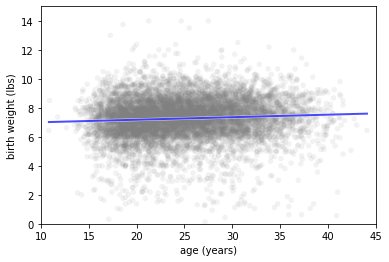

<Figure size 576x432 with 0 Axes>

In [16]:
thinkplot.Scatter(ages, weights, color='gray', alpha=0.1)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='blue', linewidth=2)
thinkplot.Show(xlabel='age (years)', ylabel='birth weight (lbs)',
               axis = [10,45,0,15], legend = False)

In [ ]:
def Residuals(xs, ys, inter, slope):
    xs = np.array(xs)
    ys = np.array(ys)
    res = ys - (inter + slope * xs)
    return res